<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Get-the-vancouver-image" data-toc-modified-id="Get-the-vancouver-image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the vancouver image</a></span></li><li><span><a href="#Read-in-the-bands--4-(red)-and-5-(near-infrared)" data-toc-modified-id="Read-in-the-bands--4-(red)-and-5-(near-infrared)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in the bands  4 (red) and 5 (near infrared)</a></span></li><li><span><a href="#Find-the-toa-reflectance-for-each-channel" data-toc-modified-id="Find-the-toa-reflectance-for-each-channel-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find the toa reflectance for each channel</a></span></li><li><span><a href="#Silence-annoying-warnings-from-numpy" data-toc-modified-id="Silence-annoying-warnings-from-numpy-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Silence annoying warnings from numpy</a></span></li><li><span><a href="#NIR-is-much-more-reflective-than-red" data-toc-modified-id="NIR-is-much-more-reflective-than-red-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>NIR is much more reflective than red</a></span></li><li><span><a href="#Calculate-the-ndvi" data-toc-modified-id="Calculate-the-ndvi-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Calculate the ndvi</a></span></li><li><span><a href="#Does-the-reflectance-step-matter?" data-toc-modified-id="Does-the-reflectance-step-matter?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Does the reflectance step matter?</a></span></li></ul></div>

# Introduction

This notebook reads in the red, and near-ir bands from a landsat 8 image
and calculates the [ndvi](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index), defined as 

$$ndvi = (nir - red)/(nir + red)$$

where nir and red are the 
respective spectral directional reflectances.

In [4]:
from pathlib import Path
from a301.utils.data_read import download
import numpy as np
import pprint
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'a301'

# Get the vancouver image

In [7]:
import rasterio
import a301
filenames=["LC08_L1TP_190031_20170528_20170615_01_T1_B4.TIF",
    "LC08_L1TP_190031_20170528_20170615_01_T1_B5.TIF",
    "LC08_L1TP_190031_20170528_20170615_01_T1_MTL.txt"]
dest_folder=a301.data_dir / Path("landsat8/italy")

ModuleNotFoundError: No module named 'a301'

In [2]:
for the_file in filenames:
    landsat_tif = Path('landsat_scenes/l8_vancouver') / Path(the_file)
    download(str(landsat_tif),dest_folder=dest_folder)
band2=list(dest_folder.glob("*_B2.TIF"))[0]
band3=list(dest_folder.glob("*_B3.TIF"))[0]
band4=list(dest_folder.glob("*_B4.TIF"))[0]
band5=list(dest_folder.glob("*_B5.TIF"))[0]
mtl_file=list(dest_folder.glob("*MTL.txt"))[0]
print(landsat_tif)

NameError: name 'filenames' is not defined

# Read in the bands  4 (red) and 5 (near infrared)

Note that rasterio is a pretty complicated object with a lot of functionality.

The full documentation is at https://rasterio.readthedocs.io/en/latest/

Save the image profile, coordinate reference system (crs) and affine transform for inspection -- these will be the same for every band in the image

In [19]:
with rasterio.open(str(band4)) as b4_raster:
    b4_data = b4_raster.read(1)
    transform=b4_raster.transform
    crs=b4_raster.crs
    profile=b4_raster.profile
with rasterio.open(str(band5)) as b5_raster:
    b5_data = b5_raster.read(1)

C:\Users\Pearl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Find the toa reflectance for each channel

Use [toa_reflectance_8](https://github.com/phaustin/a301_code/blob/c2070ca26090dc4a7e612c1e9c4ed2d9e865ae5e/a301/landsat/toa_reflectance.py#L19) to turn band counts into reflectance.

In [20]:
from a301.landsat.toa_reflectance import toa_reflectance_8
out=toa_reflectance_8([4,5],mtl_file)

Scene LC81900312017148LGN00 center time is 2017-05-28 09:46:46


# Silence annoying warnings from numpy

In [21]:
np.seterr(divide='ignore',invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

# NIR is much more reflective than red

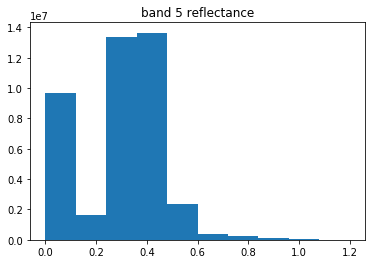

In [22]:
hit= (out[5] < 1.2) & (out[5] > 0)
plt.hist(out[5][hit].flat)
plt.title('band 5 reflectance');

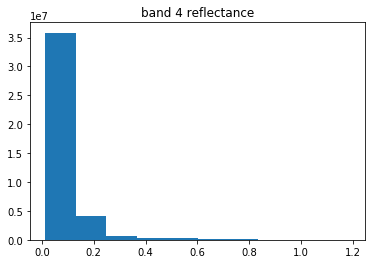

In [23]:
hit= (out[4] < 1.2) & (out[4] > 0)
plt.hist(out[4][hit].flat)
plt.title('band 4 reflectance');

# Calculate the ndvi

In [24]:
ndvi = (out[5] - out[4])/(out[5] + out[4])

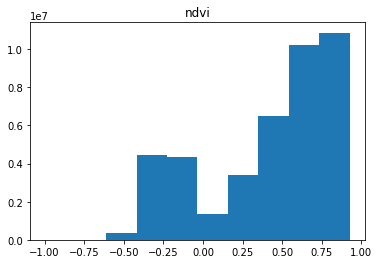

In [25]:
hit= (ndvi < 1.) & (ndvi > -1)
plt.hist(ndvi[hit].flat)
plt.title('ndvi');

# Does the reflectance step matter?

Check to see if you histograms look different when you do the ndvi with raw counts
instead of reflectance.